## Mini Project III

In [29]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

#import seaborn
import seaborn as sns

#import pandas
import pandas as pd

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('twm_customer.csv', sep=';')
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [25]:
df = df.iloc[:,1:-8] 
df

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,M,2
1,6605,71,1,0,M,2
2,18548,38,8,0,F,1
3,47668,54,3,0,F,1
4,44554,59,9,2,F,4
...,...,...,...,...,...,...
742,14795,36,6,1,F,4
743,26387,56,6,1,M,2
744,61300,50,0,2,M,2
745,15100,37,7,0,F,2


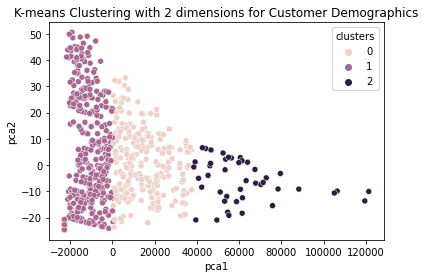

In [42]:
### Get all the features columns except the class
features = list(df.columns)

### Get the features data
data = df[features]
pca_num_components = 2

clustering_kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
data['clusters'] = clustering_kmeans.fit_predict(data)

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions for Customer Demographics')
plt.savefig('clusters')
plt.show()

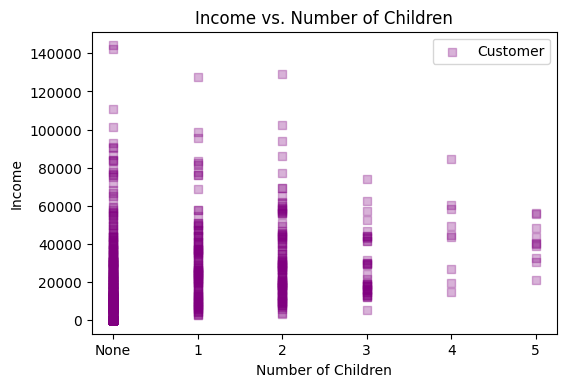

In [4]:
fig, ax = plt.subplots()
y = df['income']
x = df['nbr_children']
ax.scatter(x, y, color='purple', label='Customer', alpha=0.3, marker='s')
plt.xlabel('Number of Children')
plt.ylabel('Income')
fig.set_dpi(100)
plt.title('Income vs. Number of Children')
fig.patch.set_facecolor('white')
plt.xticks([0, 1 ,2 ,3 , 4, 5], ['None', 1, 2, 3, 4, 5])
plt.legend()
plt.savefig('Income_vs_Children')
plt.show()

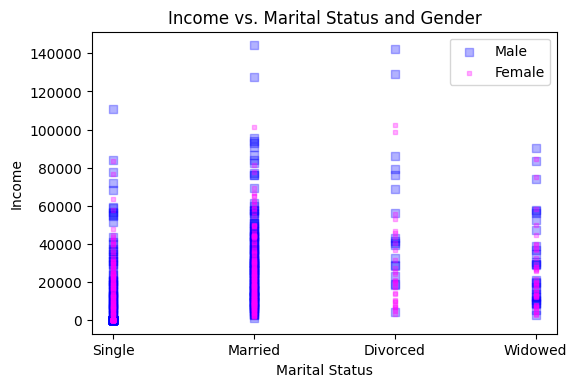

In [5]:
fig, ax = plt.subplots()
y1 = df[df['gender']=='M ']['income']
x1 = df[df['gender']=='M ']['marital_status']
y2 = df[df['gender']=='F ']['income']
x2 = df[df['gender']=='F ']['marital_status']

ax.scatter(x1, y1, color='blue', label='Male', alpha=0.3, marker='s')
ax.scatter(x2, y2, color='fuchsia', s=6, label='Female', alpha=0.3, marker='s')
plt.xlabel('Marital Status')
plt.ylabel('Income')
fig.set_dpi(100)
plt.title('Income vs. Marital Status and Gender')
fig.patch.set_facecolor('white')
plt.xticks([1 ,2 ,3 , 4], ['Single', 'Married', 'Divorced', 'Widowed'])
plt.legend()
plt.savefig('Income_vs_Marital_Status_Gender')
plt.show()

In [19]:
#Radar Chart
fig = px.scatter_polar(df, r="income", theta="marital_status")
fig.show()

ValueError: Value of 'theta' is not the name of a column in 'data_frame'. Expected one of ['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'] but received: marital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_statusmarital_status

In [18]:
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [7]:
data = df.iloc[:,1:3]
data

,income,age
0,26150,46
1,6605,71
2,18548,38
3,47668,54
4,44554,59
...,...,...
742,14795,36
743,26387,56
744,61300,50
745,15100,37


In [8]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [27]:
plot_distortion()

TypeError: plot_distortion() missing 1 required positional argument: 'X'

In [10]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [11]:
y_res = km.fit_predict(data)

In [12]:
def plot_clusters(X,y_res, xlabel, ylabel, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

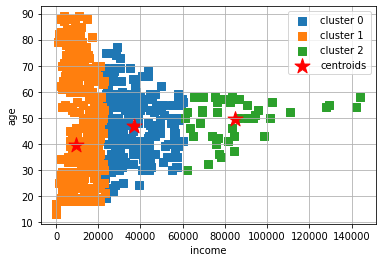

In [13]:
plot_clusters(data.values, y_res, 'income', 'age', plt_cluster_centers = True)

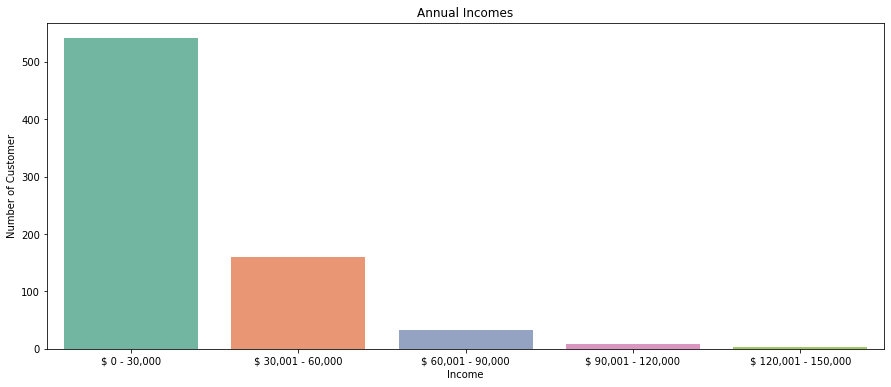

In [22]:
ai0_30 = df["income"][(df["income"] >= 0) & (df["income"] <= 30000)]
ai31_60 = df["income"][(df["income"] > 30000) & (df["income"] <= 60000)]
ai61_90 = df["income"][(df["income"] > 60000) & (df["income"] <= 90000)]
ai91_120 = df["income"][(df["income"] > 90000) & (df["income"] <= 120000)]
ai121_150 = df["income"][(df["income"] > 120000) & (df["income"] <= 150000)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.savefig('bar')
plt.show()

In [15]:
ai121_150

64     144157
246    129196
422    127848
639    142274
Name: income, dtype: int64

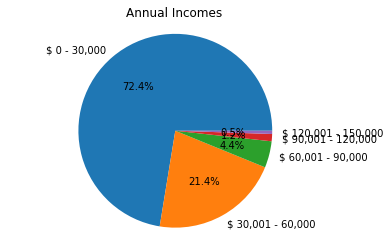

In [21]:
fig = plt.pie(aiy,labels=aix,autopct='%1.1f%%')
plt.title("Annual Incomes")
plt.axis('equal')
plt.savefig('pie')
plt.show()

### Part 2

In [15]:
df2 = pd.read_csv('twm_accounts.csv', sep=';')
df2

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [16]:
df2["acct_type"] = df2["acct_type"].astype("category")

In [17]:
df2["acct_type"].value_counts()

CK      520
CC      468
SV      421
Name: acct_type, dtype: int64

In [18]:
df2.dtypes

acct_nbr               int64
cust_id                int64
acct_type           category
account_active        object
acct_start_date       object
acct_end_date         object
starting_balance     float64
ending_balance       float64
dtype: object

In [19]:
df2['acct_type'] = df2['acct_type'].str.strip()
df2["acct_type"][0]

'SV'

In [20]:
df2[df2["acct_type"]== 'SV']

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
12,13626413,1362641,SV,N,28.11.1988,6.12.1995,139.95,141.92
13,13633773,1363377,SV,Y,1.7.1994,NaN,610.91,1782.06
15,13629403,1362940,SV,Y,22.9.1993,NaN,165.68,778.84
20,13628233,1362823,SV,Y,8.6.1992,NaN,428.17,491.88
...,...,...,...,...,...,...,...,...
1388,13626683,1362668,SV,Y,29.11.1990,NaN,213.91,1470.67
1389,13629803,1362980,SV,Y,23.12.1995,NaN,232.00,310.32
1399,13624803,1362480,SV,Y,23.12.1992,NaN,707.09,1187.97
1402,13628933,1362893,SV,Y,3.8.1995,NaN,290.57,976.43


In [21]:
encoded = pd.get_dummies(df2["acct_type"])
print(encoded)

      CC  CK  SV
0      0   0   1
1      1   0   0
2      1   0   0
3      0   1   0
4      1   0   0
...   ..  ..  ..
1404   1   0   0
1405   1   0   0
1406   1   0   0
1407   0   0   1
1408   0   1   0

[1409 rows x 3 columns]


In [22]:
#Take each account type, compare the number of transactions each customer makes for the given account type.

### Part 3

In [23]:
df3 = pd.read_csv('twm_savings_acct.csv', sep=';')
df3

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [24]:
df3['saved'] = df3['ending_balance'] - df3['starting_balance']
df3

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,saved
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-73.71


In [25]:
df4 = pd.read_csv('twm_savings_tran.csv', sep=';')
df4

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [26]:
data2 = df4.groupby(by="cust_id", dropna=False).sum()
df5 = df3.join(data2, on='cust_id')
data2
#count and total of tran_amt per cust_id
#Add these as columns to twm_savings_acct.csv

,tran_id,tran_amt,principal_amt,interest_amt,new_balance
cust_id,,,,,
1362480,351,482.32,465.30,17.02,30327.79
1362484,561,1929.66,1912.47,17.19,32827.05
1362486,325,-168.24,-170.34,2.10,3484.15
1362487,190,-638.84,-645.47,6.63,6750.71
1362489,253,-386.59,-394.68,8.09,10029.50
...,...,...,...,...,...
1363490,78,34.24,0.00,34.24,27429.51
1363491,171,-187.63,-188.89,1.26,3733.75
1363492,325,164.08,149.67,14.41,25233.52


In [27]:
df5

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,saved,tran_id,tran_amt,principal_amt,interest_amt,new_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50,1176.0,9.50,6.25,3.25,10417.98
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84,190.0,-638.84,-645.47,6.63,6750.71
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78,78.0,3.78,0.00,3.78,3027.27
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07,78.0,9.07,0.00,9.07,7261.90
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33,300.0,890.33,857.83,32.50,63006.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,351.24,496.0,351.24,348.35,2.89,6279.22
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,174.73,561.0,174.91,163.59,11.32,29976.00
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,211.08,231.0,212.70,201.92,10.78,12498.25
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-73.71,406.0,-73.71,-76.33,2.62,5223.85


In [28]:
test = df4['cust_id'].value_counts().to_frame()
test = test.rename({'cust_id' : 'counts'}, axis=1)
test = test.reset_index()

In [29]:
test = test.rename({'index' : 'cust_id'}, axis=1)

In [30]:
test

,cust_id,counts
0,1363468,62
1,1362567,57
2,1362827,55
3,1362766,55
4,1362777,55
...,...,...
415,1363254,7
416,1362964,6
417,1363135,5
418,1363351,4


In [31]:
df5 = df5.merge(test, how='outer', on='cust_id')

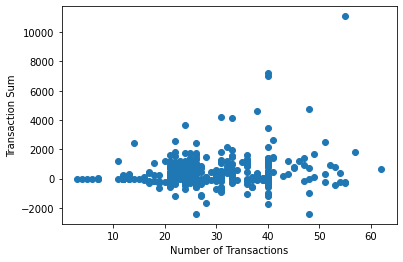

In [48]:
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

In [41]:
df5['counts'] = df5['counts'].fillna(0)
df5
df5.to_csv('savings_merged.csv')
df5

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,saved,tran_id,tran_amt,principal_amt,interest_amt,new_balance,counts
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50,1176.0,9.50,6.25,3.25,10417.98,48.0
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84,190.0,-638.84,-645.47,6.63,6750.71,19.0
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78,78.0,3.78,0.00,3.78,3027.27,12.0
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07,78.0,9.07,0.00,9.07,7261.90,12.0
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33,300.0,890.33,857.83,32.50,63006.62,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,351.24,496.0,351.24,348.35,2.89,6279.22,31.0
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,174.73,561.0,174.91,163.59,11.32,29976.00,33.0
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,211.08,231.0,212.70,201.92,10.78,12498.25,21.0
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-73.71,406.0,-73.71,-76.33,2.62,5223.85,28.0


In [33]:
data = df5.loc[:,['counts', 'tran_amt']]
data = data.dropna()

C:\Users\emreb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


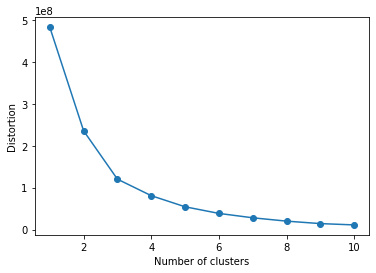

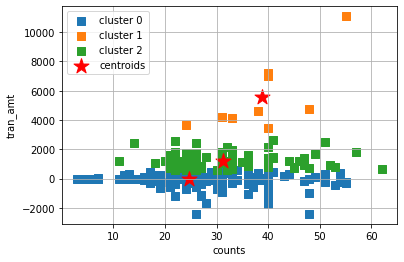

In [34]:
plot_distortion(data)
y_res = km.fit_predict(data)
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
plot_clusters(data.values, y_res, 'counts', 'tran_amt', plt_cluster_centers = True)

### Part 4

In [35]:
df6 = pd.read_csv('twm_credit_tran.csv', sep=';')
df6

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [36]:
df7 = pd.read_csv('twm_credit_acct.csv', sep=';')
df7

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [37]:
data3 = df6.groupby(by="cust_id", dropna=False).sum()
df8 = df7.join(data3, on='cust_id')
df8

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id,tran_amt,principal_amt,interest_amt,new_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,2346.0,380.03,370.77,9.26,-22701.09
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,528.0,-1535.59,-1548.23,13.63,-25387.04
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,253.0,6977.25,6896.57,80.68,-7765.31
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,120.0,2406.65,2302.14,104.69,-28837.36
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,2016.0,-956.10,-1000.00,44.44,-38221.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,2850.0,18.55,-2.11,20.66,-58627.85
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,2775.0,-188.48,-306.11,118.98,-79088.64
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,2926.0,-1218.94,-1218.94,0.00,-35198.02
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,406.0,-9200.00,-9200.00,0.00,-143356.40


In [38]:
data = df8.loc[:,['credit_limit', 'tran_amt']]
data = data.dropna()

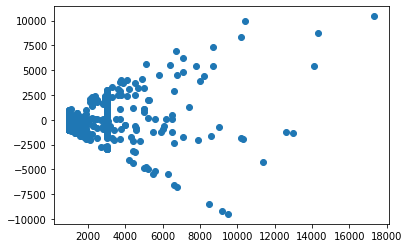

In [52]:
plt.scatter(df8['credit_limit'], df8['tran_amt'])
plt.show()

C:\Users\emreb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


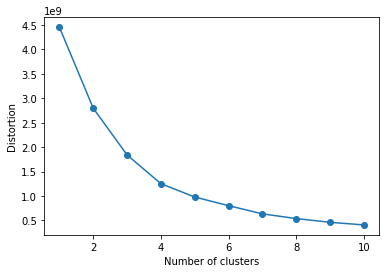

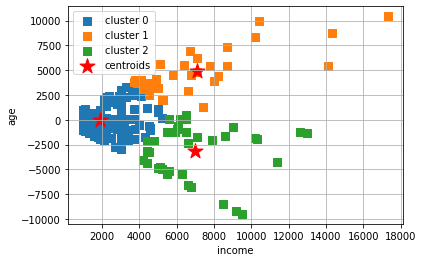

In [40]:
plot_distortion(data)
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(data)
plot_clusters(data.values, y_res, 'income', 'age', plt_cluster_centers = True)